In [32]:
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



# to make this notebook's output stable across runs
np.random.seed(42)


# Fetching Mnist Dataset

In [19]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784',version=1, cache=True, return_X_y=True )

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [20]:
 print( X )


       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [21]:

print( X.shape )
print( X.shape[1] )

(70000, 784)
784


In [22]:
print(  y  )

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [23]:
# Use the notion of y=f(X)
y = y.astype(int)


In [24]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64


In [25]:

print( y.shape)
print( y.shape[0])

(70000,)
70000


In [26]:


print('Data size: {0} x {1} and label size {2}'.format( X.shape[0] ,   X.shape[1]  ,  y.shape[0] ) )
print('The images are of size: {0} x {0}'.format( math.sqrt (X.shape[1])   )   )


Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0


In [27]:
print(type(X))
X =  X.to_numpy( )
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


# train test spilt

In [60]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,  y, test_size = 0.1, stratify=y, random_state=42)

In [61]:

print(  " The Number of Training data is " ,  X_train.shape[0] )
print(  " The Number of Testing data is "  ,  X_test.shape[0] )


 The Number of Training data is  63000
 The Number of Testing data is  7000


# KNN classifier

In [62]:
# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=4)

# classifier Evaluation  

In [63]:
# Evaluate the classifier on test data
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9727142857142858


In [64]:
y_pred = knn.predict(X_test) 

In [65]:
from sklearn.metrics import *
def evaluate(test, pred):
    accuracy = accuracy_score(test, pred)
    precision = precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')
    
    print('Accuracy', accuracy)
    print('Precision', precision)
    print('Recall', recall)
    print('F1-Score', f1)

In [66]:
from sklearn.metrics import classification_report
import seaborn as sns 

from sklearn.metrics import  confusion_matrix

def Classification_Report(  y_actual , y_predict):
    print( "Classification Report" )
    print ( classification_report(  y_actual , y_predict  )  )  # to represent accuacy, precision, recall and f1 score


def drawing_conf_matrix(  y_actual , y_predict ):
    
    conf_mat = confusion_matrix( y_actual,   y_predict )   # to represent confusion matrix ( TP , FP , FN , FN )
    
    print( "Confusion Matrix")
    print( conf_mat )
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [67]:
evaluate(y_test,y_pred)

Accuracy 0.9727142857142858
Precision 0.9731545368968746
Recall 0.9723103963264108
F1-Score 0.9725548725216907


In [68]:
#Classification_Report
Classification_Report( y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       690
           1       0.96      1.00      0.98       788
           2       0.99      0.97      0.98       699
           3       0.96      0.97      0.96       714
           4       0.97      0.96      0.97       682
           5       0.96      0.97      0.97       631
           6       0.98      0.99      0.99       688
           7       0.97      0.98      0.98       729
           8       1.00      0.93      0.96       683
           9       0.95      0.96      0.96       696

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



Confusion Matrix
[[686   1   0   0   0   0   2   0   0   1]
 [  0 786   0   1   1   0   0   0   0   0]
 [  4   6 680   2   1   0   0   6   0   0]
 [  1   2   3 691   0   8   1   4   2   2]
 [  0   5   1   0 658   0   3   0   0  15]
 [  1   0   1   8   1 613   5   0   0   2]
 [  1   1   0   0   2   2 682   0   0   0]
 [  0   8   0   0   1   0   0 712   0   8]
 [  5   5   0  17   2  10   1   4 634   5]
 [  2   5   0   3  10   3   0   5   1 667]]


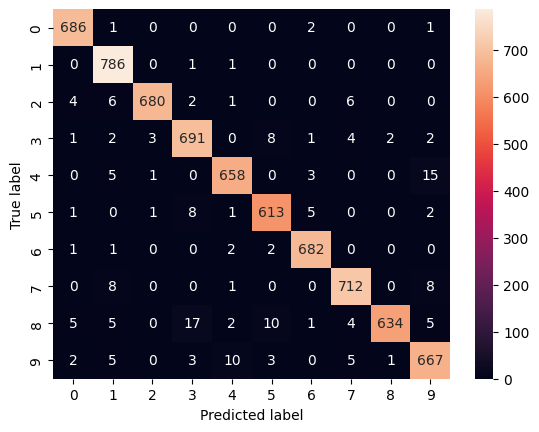

In [69]:
# conf_matrix
drawing_conf_matrix( y_test, y_pred  )